In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Abdul rehman\Desktop\Fraud_Data.csv")

In [6]:
df.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2/24/2015 22:55,4/18/2015 2:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,6/7/2015 20:39,6/8/2015 1:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,1/1/2015 18:52,1/1/2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,4/28/2015 21:13,5/4/2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,7/21/2015 7:09,9/9/2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
df.shape

(151112, 11)

In [3]:
# Data Preprocessing
# Convert date-time columns to datetime objects
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [4]:
df['signup_day'] = df['signup_time'].dt.day
df['signup_month'] = df['signup_time'].dt.month
df['purchase_day'] = df['purchase_time'].dt.day
df['purchase_month'] = df['purchase_time'].dt.month

In [6]:
# Drop unnecessary columns
df.drop(['user_id', 'device_id', 'signup_time', 'purchase_time', 'ip_address'], axis=1, inplace=True)

In [7]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
df['source'] = label_encoder.fit_transform(df['source'])
df['browser'] = label_encoder.fit_transform(df['browser'])
df['sex'] = label_encoder.fit_transform(df['sex'])

In [8]:
# Split the dataset into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

In [9]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),  # Change 1
    'Neural Network': MLPClassifier(random_state=42)  # Change 2
}

In [15]:
# Train and evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = accuracy

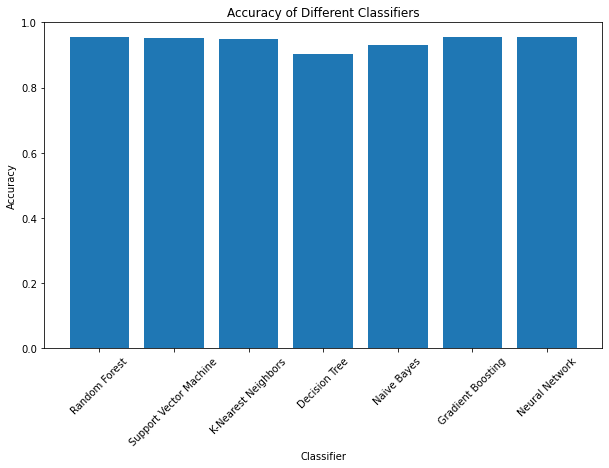

In [16]:
# Visualize accuracy
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.show()

In [17]:
# Print accuracy results
for clf_name, accuracy in results.items():
    print(f'{clf_name}: {accuracy:.4f}')

Random Forest: 0.9560
Support Vector Machine: 0.9533
K-Nearest Neighbors: 0.9498
Decision Tree: 0.9018
Naive Bayes: 0.9319
Gradient Boosting: 0.9548
Neural Network: 0.9560


In [18]:
# Confusion matrix and classification report
for clf_name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f'{clf_name}:\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}\n')

Random Forest:

Confusion Matrix:
[[27356    17]
 [ 1314  1536]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       0.99      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.97      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223


Support Vector Machine:

Confusion Matrix:
[[27276    97]
 [ 1313  1537]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27373
           1       0.94      0.54      0.69      2850

    accuracy                           0.95     30223
   macro avg       0.95      0.77      0.83     30223
weighted avg       0.95      0.95      0.95     30223


K-Nearest Neighbors:

Confusion Matrix:
[[27163   210]
 [ 1307  1543]]
Classification Report:
              precision    recall  f1-score   support

          

In [19]:
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

In [20]:
rank_table = pd.DataFrame(list(sorted_results.items()), columns=['Classifier', 'Accuracy'])

In [21]:
rank_table['Rank'] = range(1, len(rank_table) + 1)

In [22]:
print(rank_table)

               Classifier  Accuracy  Rank
0          Neural Network  0.955994     1
1           Random Forest  0.955961     2
2       Gradient Boosting  0.954770     3
3  Support Vector Machine  0.953347     4
4     K-Nearest Neighbors  0.949806     5
5             Naive Bayes  0.931939     6
6           Decision Tree  0.901764     7


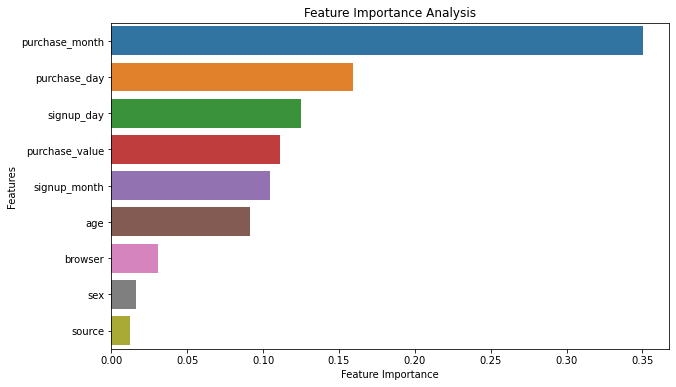

In [23]:
# Feature Importance analysis using Random Forest
plt.figure(figsize=(10, 6))
clf = RandomForestClassifier(random_state=42)  # You can change the classifier here
X = df.drop('class', axis=1)
y = df['class']
clf.fit(X, y)
feature_importance = clf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = X.columns[sorted_indices]
sns.barplot(x=feature_importance[sorted_indices], y=sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

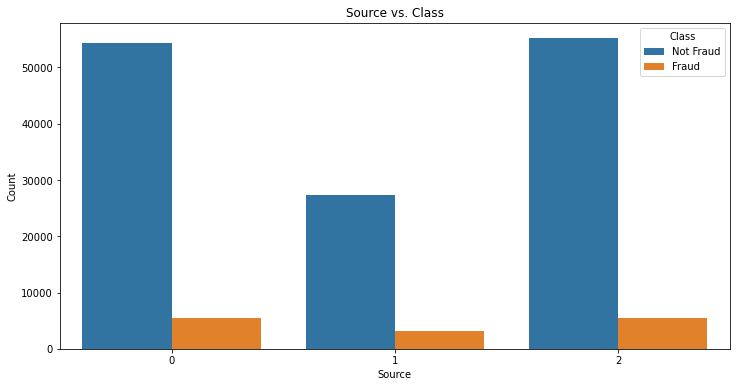

In [24]:
# Data Exploration Visualizations (You can customize this part)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='source', hue='class')
plt.title('Source vs. Class')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()

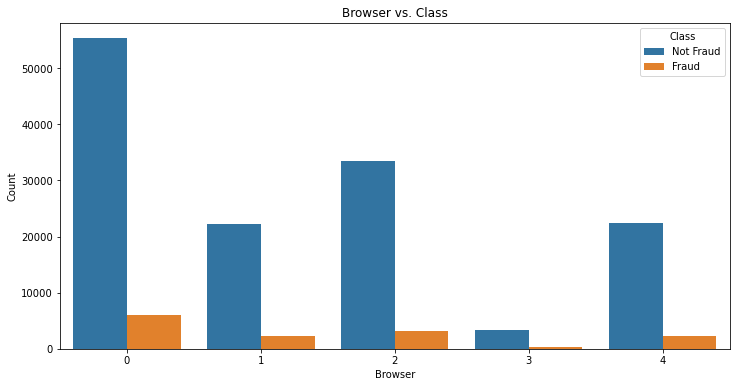

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='browser', hue='class')
plt.title('Browser vs. Class')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()

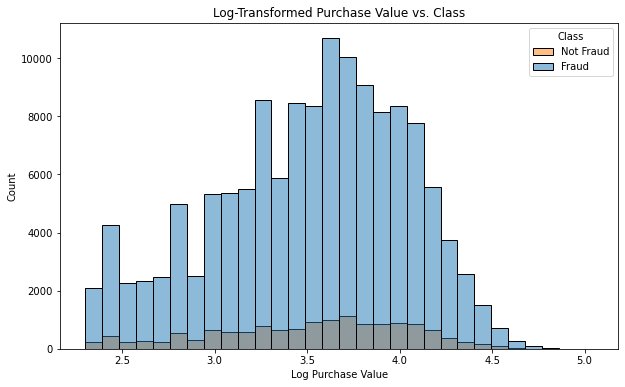

In [36]:
# Example of log transformation feature engineering
df['log_purchase_value'] = np.log1p(df['purchase_value'])

# Visualization of log-transformed purchase values
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='log_purchase_value', hue='class', bins=30)
plt.title('Log-Transformed Purchase Value vs. Class')
plt.xlabel('Log Purchase Value')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()


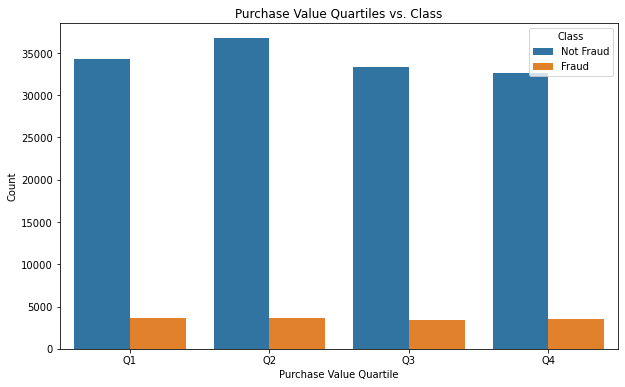

In [40]:
# Example of purchase value quartiles feature engineering
df['purchase_value_quartile'] = pd.qcut(df['purchase_value'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Visualization of purchase value quartiles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='purchase_value_quartile', hue='class')
plt.title('Purchase Value Quartiles vs. Class')
plt.xlabel('Purchase Value Quartile')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()
